In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_auto():

	# import data
	Auto = pd.read_csv('../../datasets/Auto.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
	Auto.columns
	# Extract relevant input and output for traning
	X_train = Auto.drop(columns='mpg')
	Y_train = Auto[['mpg']]

	return X_train, Y_train

In [2]:
# apply normalization techniques on the samples
def normalize(X):
    for column in X.columns:
        X[column] = (X[column] - X[column].mean()) / np.sqrt(np.mean((X[column] - X[column].mean())**2))
            
    return X

In [4]:

class LinearRegressionGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    lr : float
        Learning rate
    n_step : int
        No of passes over the training set
    Attributes
    ----------
    w_ : array-like, shape = [n_features, 1]
        weights
    b_: array-like, shape = [1, ]
        biases
    cost_ : list
        total error of the model after each iteration
    """

    def __init__(self, lr=0.1, n_step=1000, n_feature=1):
        """Initialize the weights and biases
        """
        self.lr = lr
        self.n_step = n_step
        self.w_ = np.zeros((n_feature, 1))
        self.b_ = np.zeros(1,)
        self.cost_ = []

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        n = x.shape[0]
        for _ in range(self.n_step):
            y_pred = np.dot(x, self.w_) + self.b_
            residuals = y_pred - y
            
            # calculate the cost
            cost = np.sum((residuals ** 2)) / n 
            self.cost_.append(cost)

            # calculate the gradients for weights and biases
            gradient_vector_w = np.dot(x.T, residuals)
            gradient_vector_b = np.mean(residuals)

            # update weights and biases with gradients
            self.w_ -= (self.lr / n) * gradient_vector_w
            self.b_ -= self.lr * gradient_vector_b

        return self

    def predict(self, x):
        """ Predicts the value for sample x
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_) + self.b_

In [7]:
X_train, Y_train= load_auto()


/tmp/ipykernel_54322/970766415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = (X[column] - X[column].mean()) / np.sqrt(np.mean((X[column] - X[column].mean())**2))


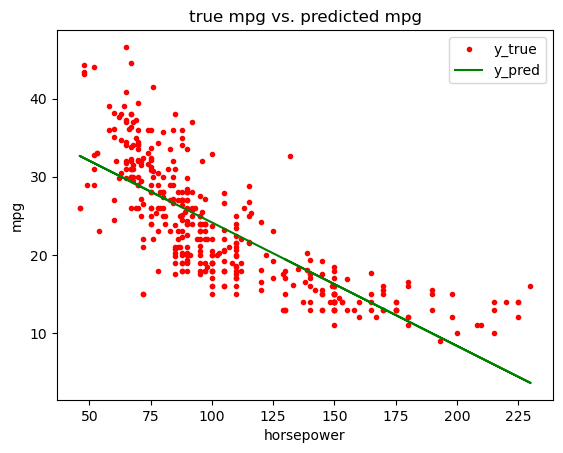

The final cost value is 23.943662938603108


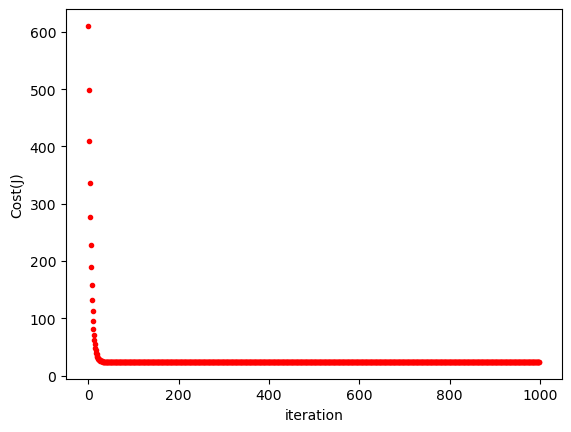

In [8]:
# LR model 1

X = X_train[['horsepower']]
Y = Y_train.values

X = normalize(X)
num_feture = X.shape[1]
LR1 = LinearRegressionGD(n_feature=num_feture)
LR1.fit(X, Y)
y_pred = LR1.predict(X)

plt.figure()
plt.plot(X_train[['horsepower']], Y, 'r.', label="y_true")
plt.plot(X_train[['horsepower']], y_pred, 'g-', label="y_pred")
plt.legend()
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('true mpg vs. predicted mpg')
plt.show()

print(f"The final cost value is {LR1.cost_[-1]}")
plt.figure()
plt.plot(LR1.cost_, 'r.')
plt.xlabel('iteration')
plt.ylabel('Cost(J)')
plt.show()

The final cost value is 10.852129973498775


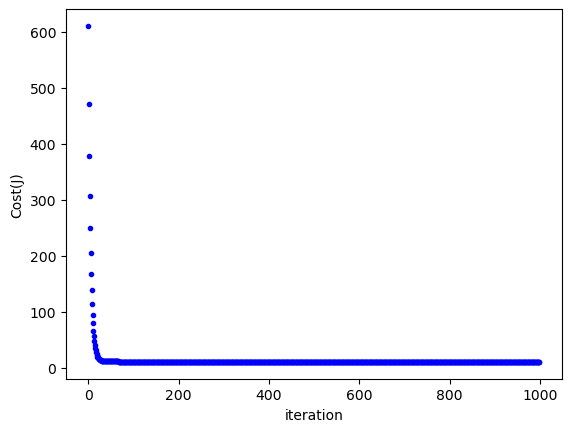

In [9]:
# LR model 2

X = X_train.drop(columns='name')
Y = Y_train.values

X = normalize(X)
num_feture = X.shape[1]
LR2 = LinearRegressionGD(n_feature=num_feture)
LR2.fit(X, Y)

print(f"The final cost value is {LR2.cost_[-1]}")
plt.plot(LR2.cost_, 'b.')
plt.xlabel('iteration')
plt.ylabel('Cost(J)')
plt.show()